链表代表着一种多个数据元素的线性集合。链表的顺序不由其在内存中的物理位置决定，而是通过每一个元素指向另一个元素来实现。链表中，一个实体对象为一个节点（Node），每个结点包含2部分：1）结点本身的数据信息(data)，称为信息域；2）指向下一个结点的地址信息(next)，称为指针域。特别需要说明的是，链表这种数据类型必须有一个元素为链首元素（空链表除外）。由于没有物理位置上的先后顺序（在内存中随机存储），链表与其他数据结构相比，随机读写（random access）更低效。而修改或删除链表中的节点却更高效（修改节点之间的指向）

### head结点：是一个特殊的结节，用于存储链表第一个结点的地址信息，永远指向链表的第一个结点；
### tail结点：是一个特殊的结点，永远指向链表的最后一个节点。链表最后一个结点的地址信息(指针域)指向None值，因也叫接地点。


由于链表的每个结点都包含了可以链接起来的地址信息，所以用一个变量就能够访问整个结点序列。

链表是计算机科学领域应用最广泛的高阶数据结构之一，它实现了数据之间保持逻辑顺序，但存储空间不必按顺序的方法。

根据结构的不同，链表可以分为单向链表、单向循环链表、双向链表、双向循环链表等。其中，单向链表和单向循环链表的结构如下图所示：
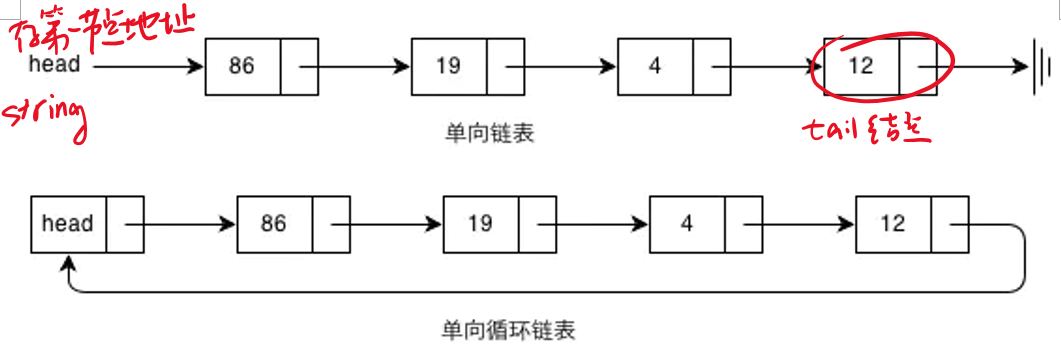

LinkedList() ：创建空链表，不需要参数，返回值是空链表；
is_empty()：测试链表是否为空，不需要参数，返回值是布尔值；
append(data) ：追加元素到链表尾部。参数是要追加的元素，无返回值；
iter()：生成器，遍历链表，无参数，无返回值；
insert(idx, value) ：插入一个元素，参数为插入元素的索引和值；
remove(idx)：移除1个元素，参数为要移除的元素或索引，并修改链表；
size() ：返回链表的元素数，不需要参数，返回值是个整数；
search(item) ：查找链表某元素，参数为要查找的元素或索引，返回是布尔值。


python用类(class)来实现链表的数据结构，节点(Node)是实现链表的基本模块，每个节点至少包括两个重要部分：值和指针(引用)。示例：

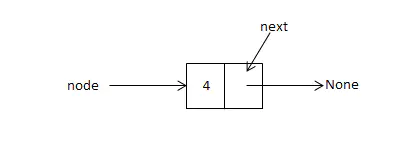

In [3]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.next = None
        
node = Node(4)
print(node)   #node是个地址

In [6]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.next = None
    def __str__(self):
        return str(self.data)

node = Node(4)
print(node)   #定义__str__()函数后，返回self.data字符串

4


https://www.jianshu.com/p/ec7e15307645

In [26]:
class Node():
    '创建节点'
    def __init__(self,data):
        self.data = data
        self.next = None

class LinkedList(object):
    '创建列表'
    def __init__(self):
        '初始化列表'
        self.head = None
        self.tail = None 

    def is_empty(self):
        '判断链表是否为空'
        return self.head is None

    def append(self, data):
        '追加元素'
        node = Node(data)   # 把Node类实例化得到一个node对象
        if self.head is None:
            # 如果链表为空，则将head和tail都指向node，即将元素设置为第一个节点
            self.head = node    
            self.tail = node
        else:
            # 如果链表非空，则将tail节点和上一个节点的next均指向当前node
            self.tail.next = node   
            self.tail = node    

    def iter(self):
        '遍历链表'
        # 如果链表为空，则返回None
        if not self.head:
            return 
        cur = self.head
        yield cur.data  # 当前节点data数据的生成器
        while cur.next:
            cur = cur.next  # 当前节点指向下一个节点并遍历
            yield cur.data  # 当前节点data数据的生成器

    def insert(self, idx, value):  #注意：index从0开始计
        '插入元素'
        cur = self.head
        cur_idx = 0
        if cur is None:
            raise Exception('The linked_list is empty')
        while cur_idx < idx - 1:
            cur = cur.next
            if cur is None:
                raise Exception('list length less than index')
            cur_idx += 1
        node = Node(value)
        node.next = cur.next
        cur.next = node 
        if node.next is None:
            self.tail = node

    def remove(self, idx):
        '删除元素'
        cur = self.head
        cur_idx = 0
        if self.head is None:   # 空链表时
            raise Exception('The linked_list is empty')
        while cur_idx < idx - 1:
            cur = cur.next
            if cur is None:
                raise Exception('list length less than index')
            cur_idx += 1
        #cur.next = cur.next.next  这个语句放在这里会影响下面if idx == 0:的条件判断
        if idx == 0:    # 当删除第一个节点时
            self.head = cur.next
            cur = cur.next
            return 
        if self.head is self.tail:  # 当只有一个节点的链表时
            self.head = None
            self.tail = None
            return
        cur.next = cur.next.next
        if cur.next is None:    # 当删除的节点是链表最后一个节点时
            self.tail = cur     #因为前面cur.next = cur.next.next已经删完了

    def size(self):
        '统计元素个数'
        cur = self.head
        count = 0
        if cur is None:
            raise Exception('The linked_list is empty')
        while cur is not None:
            count += 1
            cur = cur.next
        return count

    def search(self, item):
        '查找指定元素'
        cur = self.head
        found = False
        while cur is not None and not found:
            if cur.data == item:
                found = True
            else:
                cur = cur.next
        return found

In [27]:
if __name__ == '__main__':
    link_list = LinkedList()    # 实例化
    print(link_list.is_empty())     # 判断是否为空
    for i in range(3):
        link_list.append(i)     # 追加3个元素0，1，2
    for node in link_list.iter():
        print(node) 

True
0
1
2


In [28]:
link_list.insert(2, 1000) #在第3个位置插入1000
for node in link_list.iter():
    print(node) 

0
1
1000
2


In [29]:
link_list.remove(0)     # 删除第一个元素
for node in link_list.iter():
    print(node) 

1
1000
2


In [30]:
print(link_list.search(10))

False
